In [1]:
# Practice for KNN and Kmeans

# Kmeans clustering

In [2]:
# %matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

## Generating data

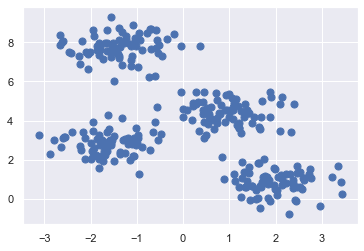

In [3]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

## Using Kmeans function from SKlearn

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)  # calculating clusters
y_kmeans = kmeans.predict(X)  # predicting labels

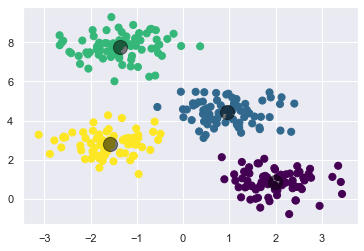

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

![Kmeans](img/kmeans.png)

## Write K-means function

In [6]:
# Function: K Means
# -------------
# K-Means is an algorithm that takes in a dataset and a constant
# k and returns k centroids (which define clusters of data in the
# dataset which are similar to one another), and the corresponding 
# labels

def get_labels(X, centers):
    # Function: Get Labels
    # -------------
    # Returns a label for each piece of data in the dataset. 
    
    dist_mat = np.array([np.sqrt( ((X - center_i)**2).sum(axis = 1) ) for center_i in centers ]).T
    labels = np.argmin(dist_mat, axis = 1)
    return labels

def find_centers(X, centers, n_clusters, labels):
    # -------------
    # Returns k random centroids, each of dimension n.
    
    new_centers = np.zeros_like(centers)
    for i in range(n_clusters):
        if sum(labels == i) == 0:
            new_centers[i,:] = X[rng.permutation(X.shape[0])[0]]
        else:
            new_centers[i,:] = X[labels == i].mean(0)         
    return new_centers

def should_stop(centers, new_centers, iteration,  max_iter):
    # Function: Should Stop
    # -------------
    # Returns True or False if k-means is done. K-means terminates either
    # because it has run a maximum number of iterations OR the centroids
    if np.all(centers == new_centers):
        return True
    elif iteration == max_iter:
        print('Max iteration!')
        return True
    else:
        return False


    
    
def find_clusters(X, n_clusters, max_iter, rseed=2):
    # 1. Randomly choose clusters
#     rng = np.random.RandomState(rseed)
    rng = np.random.RandomState()
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    iteration = 0
    
    while True:
        
        iteration = iteration+1
        # 2a. Assign labels based on closest center
        labels = get_labels(X, centers)
        
        # 2b. Find new centers from means of points
        # caution: assign new random centroid if none
        new_centers = find_centers(X, centers, n_clusters, labels)
        
        # 2c. Check for convergence
        if should_stop(centers, new_centers, iteration, max_iter):
            break
        else:
            centers = new_centers
            
    print('Iteration number: ',iteration)
    return centers, labels


## Testing the Kmeans function 

- Data features: X
- Data labels:   y_true
- Num of clusters:  4

Iteration number:  9


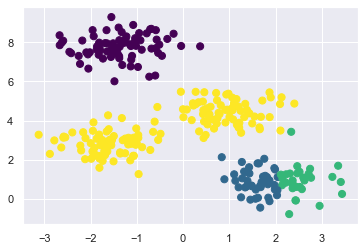

In [7]:
centers, labels = find_clusters(X, 4, max_iter = 10)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

# KNN classifier

- Data features: X
- Data labels:   y_true
- Num of clusters:  4

In [8]:
import numpy as np

"""
This code was based off of code from cs231n at Stanford University, and modified for ece239as at UCLA.
"""

class KNN(object):

  def __init__(self):
    pass

  def train(self, X, y):
    """
	Inputs:
	- X is a numpy array of size (num_examples, D)
	- y is a numpy array of size (num_examples, )
    """
    self.X_train = X
    self.y_train = y

  def compute_distances(self, X, norm=None):
    """
    Compute the distance between each test point in X and each training point
    in self.X_train.
    Inputs:
    - X: A numpy array of shape (num_test, D) containing test data.
	- norm: the function with which the norm is taken.
    Returns:
    - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
      is the Euclidean distance between the ith test point and the jth training
      point.
    """
    if norm is None:
      norm = lambda x: np.sqrt(np.sum(x**2))
      #norm = 2

    num_test = X.shape[0]
    num_train = self.X_train.shape[0]
    dists = np.zeros((num_test, num_train))
    for i in np.arange(num_test):
        
      for j in np.arange(num_train):
		# ================================================================ #
    	# YOUR CODE HERE:
		#   Compute the distance between the ith test point and the jth       
        #   training point using norm(), and store the result in dists[i, j].     
    	# ================================================================ #

        # pass
        dists[i,j] = norm( X[i,:] - self.X_train[j,:] )

		# ================================================================ #
		# END YOUR CODE HERE
		# ================================================================ #

    return dists

  def compute_L2_distances_vectorized(self, X):
    """
    Compute the distance between each test point in X and each training point
    in self.X_train WITHOUT using any for loops.
    Inputs:
    - X: A numpy array of shape (num_test, D) containing test data.
    Returns:
    - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
      is the Euclidean distance between the ith test point and the jth training
      point.
    """
    num_test = X.shape[0]
    num_train = self.X_train.shape[0]
    dists = np.zeros((num_test, num_train))

	# ================================================================ #
	# YOUR CODE HERE:
	#   Compute the L2 distance between the ith test point and the jth       
    #   training point and store the result in dists[i, j].  You may 
	#	NOT use a for loop (or list comprehension).  You may only use
	# 	numpy operations.
	#
	# 	HINT: use broadcasting.  If you have a shape (N,1) array and
	#   a shape (M,) array, adding them together produces a shape (N, M) 
	#   array.
	# ================================================================ #

    # pass
    Xtr_norms = np.sum(self.X_train**2, axis=1)
    Xte_norms = np.sum(X**2, axis=1, keepdims=True)
    cross_terms = -2.0 * np.matmul(X, self.X_train.T)
    dists = np.sqrt(Xtr_norms + Xte_norms + cross_terms)
	# ================================================================ #
	# END YOUR CODE HERE
	# ================================================================ #

    return dists


  def predict_labels(self, dists, k=1):
    """
    Given a matrix of distances between test points and training points,
    predict a label for each test point.
    Inputs:
    - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
      gives the distance betwen the ith test point and the jth training point.
    Returns:
    - y: A numpy array of shape (num_test,) containing predicted labels for the
      test data, where y[i] is the predicted label for the test point X[i].  
    """
    num_test = dists.shape[0]
    y_pred = np.zeros(num_test)
    for i in np.arange(num_test):
      # A list of length k storing the labels of the k nearest neighbors to
      # the ith test point.
      closest_y = []
  	  # ================================================================ #
  	  # YOUR CODE HERE:
  	  #   Use the distances to calculate and then store the labels of 
	  #   the k-nearest neighbors to the ith test point.  The function
	  #   numpy.argsort may be useful.
	  #   
	  #   After doing this, find the most common label of the k-nearest
	  #   neighbors.  Store the predicted label of the ith training example
	  #   as y_pred[i].  Break ties by choosing the smaller label.
  	  # ================================================================ #
  
      # pass

      #pass
      sort_idx = np.argsort(dists[i,:] )
      #closest_y = self.y_train(sort_idx[0:k])
      for j in range(k):
            closest_y.append(self.y_train[sort_idx[j]])
      #pass
      def most_common(lst):
        return max(set(lst), key=lst.count)
      y_pred[i] = most_common(closest_y)

  	  # ================================================================ #
  	  # END YOUR CODE HERE
  	  # ================================================================ #

    return y_pred

In [9]:
knn_classifier = KNN()

In [10]:
knn_classifier.train(X, y_true)

In [11]:
dists = knn_classifier.compute_distances( X)

In [12]:
plabel = knn_classifier.predict_labels( dists, k=1)

In [13]:
accuracy = sum(plabel == y_true) / float(len(plabel))
print( 'The classification accuracy is: ',accuracy)

The classification accuracy is:  1.0
